In [1]:

#pip install -U scikit-learn
#pip install matplotlib
#pip install opencv-python
#pip install numpy
#pip install Optimizers
#pip install tensorflow
#Tensorflow (Keras uses TensorFlow in backend and for some image preprocessing)

import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Machine lEARNING Model preparation
from sklearn.utils import shuffle #For shuffling the Images data

In [4]:
import os
print(os.getcwd())

data = pd.read_csv(r"./data/A_Z Handwritten Data.csv").astype('float32')

print(data.head(10)) #We are getting first ten images data
#This data set contains all the Images in data form

d:\Kajal\Coding\Machine-Learning-Handwritten-Character-Recognition-main\Machine-Learning-Handwritten-Character-Recognition-main
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0  \
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.

In [5]:
#Preparation for the Machine Learning Model we have to get the X and Y axis.
#In X axis we are droping the first column
#The ‘0’ contains the labels, & so we drop the ‘0’ column from the data dataframe read
X = data.drop('0',axis = 1)
y = data['0'] #and put the 0 column in the label y

In [6]:
#IN this step Machine learning Model preparation for spliting test and Train data. We
#Test size would be your choise here I put it 0.2 % data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
#The below step  is to reshape the Image and Label data according to our requirement
#shape size would be [28,28]

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)
#After printing you will get the Train Data "Train data shape:  (297960, 28, 28)"
#After printing you will get the Test Data "Test data shape:  (74490, 28, 28)"


Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [8]:
#This is the self made dictionary of Alphabets agains number 0 will be A , 1 will be B and so on
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [9]:
#The below step is used to convert the any Labels number to integers 
#Firstly we convert the labels into integer values and append into 
#the count list according to the label. 
#This count list has the number of images present in the dataset belonging to each alphabet.
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
print(count)
for i in y_int:
   count[i] +=1
    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_20280\3278067781.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  y_int = np.int0(y)


In [10]:
#We get the list named alphabets for the Comparision purpose 
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

In [11]:
alphabets[1]

'B'

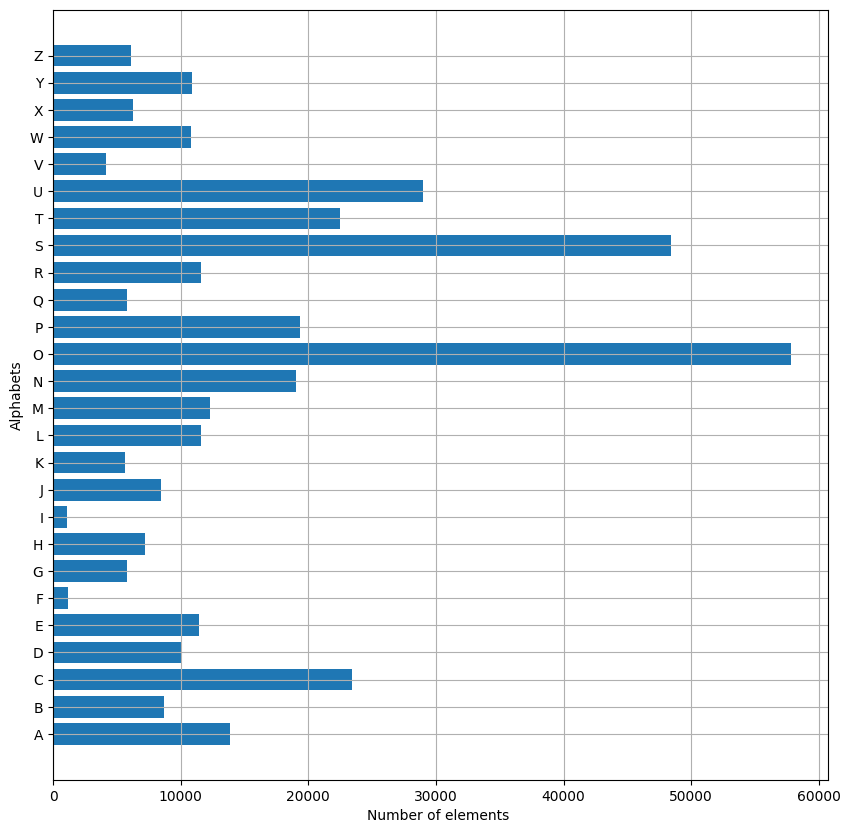

In [12]:
#We are ploting the bar graph of size 10 , 10
#In which we can clearly see that Alphabets "o" frequency is greater than 50,000 
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

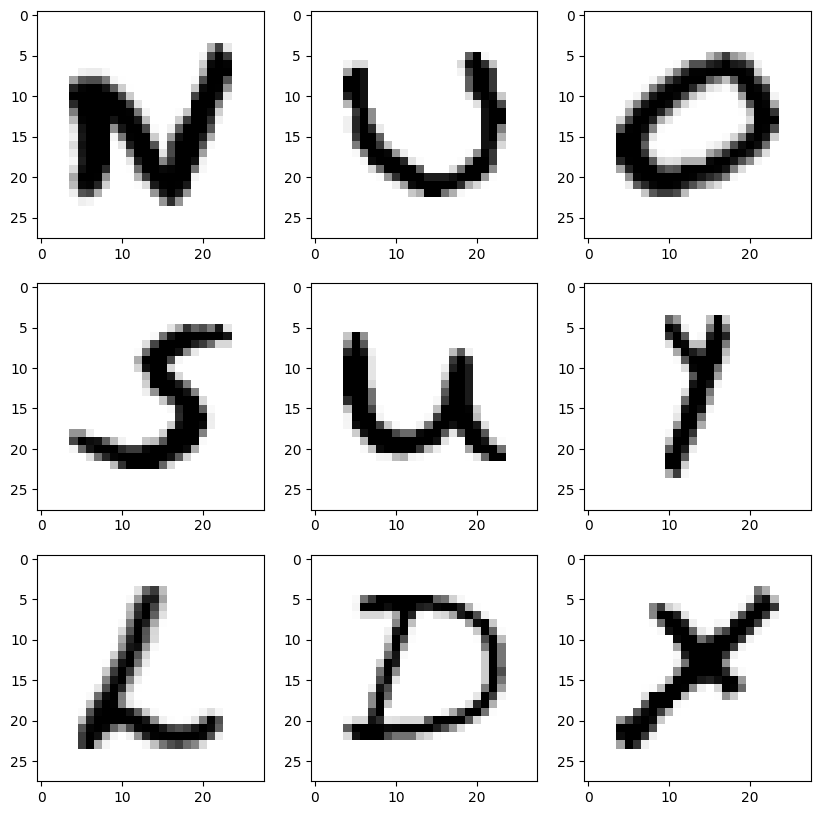

In [13]:
#Here we will shuffle the images data to get the random alphabets for accuracy purpose. 
#We then create 9 plots data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAmQAAAJNCAYAAACfsmlCAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3de5xdaVng+9/TRWgKtqSBClHThBCDN6ixJREFHdkFimBQQLBt7DnQ4rHGK4LBM1FncpBzPMRLNI2gWEEQHS4iijBEBQbYKsiApGkIiKG76eJywG6g5bKxgKT6mT/2jmyKpG6p9b6rsn/fz6c+2Wvttdfz1JNm8+Rd73pXZCaSJEmq55LaCUiSJI07GzJJkqTKbMgkSZIqsyGTJEmqzIZMkiSpMhsySZKkyu5QO4Hzueyyy3LPnj210xgbn/vc57jLXe5SO42xYb3Lst5lWe+yrHc5y9X6xIkTn8jMbes9d2sbsu3bt/OOd7yjdhpjo9fr0e12a6cxNqx3Wda7LOtdlvUuZ7laR8QHL+TcXrKUJEmqzIZMkiSpMhsySZKkymzIJEmSKrMhkyRJqsyGTJIkqTIbMkmSpMpsyCRJkiqzIZMkSarMhkySJKkyGzJJkqTKbMgkSZIqsyGTJEmqzIZMkiSpMhsySZKkymzIJEmSKrMhkyRJqsyGTJIkqTIbMkmSpMpsyCRJkiqzIZMkSarMhkySJKkyGzJJkqTK7lA7gfNZOL3IroPHa6fRmPnD+2unIEmSWsIRMkmSpMpsyCRJkiqzIZMkSaqsSEMWEY+NiOuX/NweEY8sEV+SJKnNikzqz8xXAq88ux0Rs8DVwGtLxJckSWqz4ndZRsTXA4eAB2fm7aXjS5IktU3ROWQRsQV4CfD0zPxQydiSJEltFZlZLljEYeBrMvNJ53l/FpgFmJratvfQ0WPFcittesfW2il8mX6/T6fTqZ3G2LDeZVnvsqx3Wda7nOVqPTMzcyIz96333MUuWUZEF3gc8IDzHZOZc8AcwM7de/LIydauW3vB5q/u1k7hy/R6Pbrdbu00xob1Lst6l2W9y7Le5TRZ6yIdT0TcDXgh8KOZ+dkSMSVJkjaLUkNQPwncE/j9iBjd/6zM/NNCOUiSJLVSqWUvngU8q0QsSZKkzcaV+iVJkiqzIZMkSaqstbcxTm6Z4NTh/bXTkCRJapwjZJIkSZXZkEmSJFVmQyZJklRZa+eQLZxeZNfB47XTGBsHps9wzTL1nnc+nyRJjXGETJIkqTIbMkmSpMpsyCRJkior0pDFwJsj4pEj+66MiL8pEV+SJKnNSj3LMiPiJ4E/i4g3ARPArwGPKBFfkiSpzYrdZZmZ74mI/wH8F+AuwB9n5k2l4kuSJLVV6WUvfhW4DvgisK9wbEmSpFaKzCwbMOKZQD8zf+Mc780CswBTU9v2Hjp6rGhu42z7JNyycP73p3dsLZfMGOj3+3Q6ndppjA3rXZb1Lst6l7NcrWdmZk5k5roHm2osDHv78OcrZOYcMAewc/eePHKytevWXnQOTJ9huXrPX90tl8wY6PV6dLvd2mmMDetdlvUuy3qX02StXfZCkiSpMhsySZKkyopfE8zMZ5SOKUmS1GaOkEmSJFVmQyZJklRZa29jnNwywanD+2unMTZ6vZ53UkqSVIkjZJIkSZXZkEmSJFVmQyZJklRZa+eQLZxeZNfB47XTaNy88+QkSRp7jpBJkiRVZkMmSZJUmQ2ZJElSZY03ZBFxr4i4OSLuPty+23D73k3HliRJ2gwab8gy88PA7wOHh7sOA3OZ+cGmY0uSJG0Gpe6y/B3gREQ8Ffgu4OcKxZUkSWq9Ig1ZZp6OiF8E/gZ4eGZ+sURcSZKkzSAys0ygiKPAlcBvZubvnOeYWWAWYGpq295DR48Vya2m6R1ba6cAQL/fp9Pp1E5jbFjvsqx3Wda7LOtdznK1npmZOZGZ+9Z77iINWURcAbwYeCTwZuDbM/Njy31m5+49ecmV1zaeW21tWRi21+vR7XZrpzE2rHdZ1rss612W9S5nuVpHxAU1ZCXusgwGk/qfmpkfAn4T+K2m40qSJG0WJdYh+wngQ5n5+uH27wHfGBEPKRBbkiSp9Rqf1J+Zc8DcyPYisLfpuJIkSZuFK/VLkiRVZkMmSZJUmQ2ZJElSZaVW6l+zyS0TnGrJkhCSJElNcoRMkiSpMhsySZKkylp7yXLh9CK7Dh6vncbYODB9hmvOU++2PE1AkqSLlSNkkiRJldmQSZIkVWZDJkmSVFljDVlE/E5EPHVk+7UR8fyR7SMR8QtNxZckSdosmhwh+wfgwQARcQkwBdxv5P0HA29pML4kSdKm0GRD9haGDRmDRuw9wGcj4m4RcSnwTcA7G4wvSZK0KTS27EVmfjQizkTETgaN2VuBHcCDgE8D787MLzYVX5IkabOIzGzu5BEvBv4H8Ejgtxk0ZA9m0JDdIzMPLjl+FpgFmJratvfQ0WON5aYvt30Sblk493vTO7aWTWYM9Pt9Op1O7TTGhvUuy3qXZb3LWa7WMzMzJzJz33rP3fTCsGfnkU0zuGT5YeAA8BngBUsPzsw5YA5g5+49eeRka9etvegcmD7D+eo9f3W3bDJjoNfr0e12a6cxNqx3Wda7LOtdTpO1bnrZi7cAjwJuy8zFzLwNuIzBZcu3NhxbkiRpU2i6ITvJ4O7K/7Vk36cz8xMNx5YkSdoUGr0mmJmLwF2X7LumyZiSJEmbjSv1S5IkVWZDJkmSVJkNmSRJUmWtXVdicssEpw7vr53G2Oj1ei5vIUlSJY6QSZIkVWZDJkmSVJkNmSRJUmWtnUO2cHqRXQeP107jnOad2yZJkjaQI2SSJEmV2ZBJkiRV1nhDFhG9iPi+JfueGhG/13RsSZKkzaDECNlLgauW7LtquF+SJGnslWjIXgE8KiIuBYiIXcDXAm8uEFuSJKn1Gm/IMvOTwNuBRwx3XQX8aWZm07ElSZI2gyjRF0XEfwL2Z+YTIuJ64MmZed05jpsFZgGmprbtPXT0WOO5rcf0jq21U9hw/X6fTqdTO42xYb3Lst5lWe+yrHc5y9V6ZmbmRGbuW++5SzVkHeADDEbJXpqZ37DSZ3bu3pOXXHlt47mtx8W4Dlmv16Pb7dZOY2xY77Ksd1nWuyzrXc5ytY6IC2rIiix7kZl9oAe8ACfzS5IkfZmS65C9FPgW4GUFY0qSJLVesUcnZeYrgSgVT5IkabNwpX5JkqTKbMgkSZIqsyGTJEmqrNgcsrWa3DLBqYtweQlJkqSlHCGTJEmqzIZMkiSpMhsySZKkylo7h2zh9CK7Dh6vncbYODB9hmusdzHWe+NcjI8ykzR+HCGTJEmqzIZMkiSpsiINWUTsioj3LNn3jIh4eon4kiRJbeYImSRJUmU2ZJIkSZXZkEmSJFUWmdl8kIh7A8cz8/4j+54BfDYzj4zsmwVmAaamtu09dPRY47lpYPsk3LJQO4vxYb03zvSOrSse0+/36XQ6BbIRWO/SrHc5y9V6ZmbmRGbuW++5S61D9kngbkv23R24eXRHZs4BcwA7d+/JIydbu0zaRefA9BmsdznWe+PMX91d8Zher0e3u/Jx2hjWuyzrXU6TtS5yyTIz+8DHIuJhABFxd+ARwJtLxJckSWqzkv9EfyLw3Ig4e4nyVzPzpoLxJUmSWqlYQ5aZ/wTMlIonSZK0WXiXpSRJUmU2ZJIkSZXZkEmSJFXW2vvuJ7dMcOrw/tppjI1er7eq5QO0May3JGmUI2SSJEmV2ZBJkiRVZkMmSZJUWWvnkC2cXmTXweO10xgbB6bPcI31LqbJes8791KSNh1HyCRJkiqzIZMkSaqsyCXLiLgH8Ibh5lcDi8DHh9sPzMwvlshDkiSpjYo0ZJn5SeAKgIh4BtDPzN8qEVuSJKntvGQpSZJUmQ2ZJElSZZGZZQMuc8kyImaBWYCpqW17Dx09VjS3cbZ9Em5ZqJ3F+Giy3tM7tjZz4k2s3+/T6XRqpzE2rHdZ1ruc5Wo9MzNzIjP3rffcrVqHLDPngDmAnbv35JGTrUrvonZg+gzWu5wm6+0zMr9Sr9ej2+3WTmNsWO+yrHc5TdbaS5aSJEmV2ZBJkiRVVvwaVWY+o3RMSZKkNnOETJIkqTIbMkmSpMpsyCRJkipr7ToHk1smOHV4f+00xkav13O5hIKstyRplCNkkiRJldmQSZIkVWZDJkmSVFlr55AtnF5k18HjtdMYGwemz3CN9S7Gepdlvcuy3ms375zpsecImSRJUmU2ZJIkSZXZkEmSJFVWrCGLiF+JiPdGxLsj4vqI+PZSsSVJktqsyKT+iHgQ8CjgAZn5hYiYAu5YIrYkSVLblbrL8muAT2TmFwAy8xOF4kqSJLVeqUuWrwPuFRHvj4jfi4iHFIorSZLUepGZZQJFTAD/EZgB/jNwMDP/aMkxs8AswNTUtr2Hjh4rkptg+yTcslA7i/Fhvcuy3mVZ77Wb3rF13Z/t9/t0Op0NzEbns1ytZ2ZmTmTmvvWeu1hD9mVBIx4PPCkzf+B8x+zcvScvufLaglmNtwPTZzhysrXrBF90rHdZ1rss6712F7IwbK/Xo9vtblwyOq/lah0RF9SQFblkGRHfEBH3Hdl1BfDBErElSZLartQ/YTrA70bEZcAZ4EaGlyYlSZLGXZGGLDNPAA8uEUuSJGmzcaV+SZKkymzIJEmSKmvtbTCTWyY4dQF3nWhter0e81d3a6cxNqx3Wda7LOstrZ0jZJIkSZXZkEmSJFVmQyZJklRZa+eQLZxeZNfB47XTGBsHps9wzTrqfSGrS0uSpAFHyCRJkiqzIZMkSarMhkySJKmyInPIImIRODmMdzPwf2Tmp0rEliRJartSI2QLmXlFZt4fuA34mUJxJUmSWq/GJcu3AjsqxJUkSWqlog1ZREwADwNeXTKuJElSm0VmNh/kS3PIdgEngIdn5uI5jpsFZgGmprbtPXT0WOO5aWD7JNyysPbPTe/YuvHJjIF+v0+n06mdxtiw3mVZ77KsdznL1XpmZuZEZu5b77lLNWT9zOxExFbgNcCfZeazl/vMzt178pIrr208Nw0cmD7DkZNrv8fDhWHXp9fr0e12a6cxNqx3Wda7LOtdznK1jogLasiKXrLMzE8DTwGeHhFbSsaWJElqq+KT+jPzncC7gKtKx5YkSWqjIuuQZWZnyfYPlIgrSZK0GbhSvyRJUmU2ZJIkSZUVuWS5HpNbJjjlHXzF9Ho95q/u1k5DkqSx5AiZJElSZTZkkiRJldmQSZIkVdbaOWQLpxfZdfB47TQ2lKvaS5Kkc3GETJIkqTIbMkmSpMpsyCRJkior0pBFxOUR8aqIuCEiPhARz4mIS0vEliRJarvGG7KICOAvgL/MzPsC9wUmgd9oOrYkSdJmUGKE7KHA5zPzhQCZuQg8DXhiRHSW/aQkSdIYKNGQ3Q84MbojMz8DzAN7CsSXJElqtcjMZgNE/Dxw78z8hSX7rweuyczrR/bNArMAU1Pb9h46eqzR3Eqb3rG1dgrn1e/36XQcsCzFepdlvcuy3mVZ73KWq/XMzMyJzNy33nOXWBj2vcDjRndExF2B7cCp0f2ZOQfMAezcvSePnGzturXr0uaHd/d6Pbrdbu00xob1Lst6l2W9y7Le5TRZ6xKXLN8A3DkinggQERPAEeA5mblQIL4kSVKrNd6Q5eCa6GOBx0fEDcAngdsz89eaji1JkrQZFFmHLDM/nJk/OFz24vuBR0TE3hKxJUmS2q74JK3M/Afg3qXjSpIktZWPTpIkSarMhkySJKmy1q4rMbllglOH99dOQ5IkqXGOkEmSJFVmQyZJklRZay9ZLpxeZNfB47XTGBsHps9wjfXecPNedpckrYIjZJIkSZXZkEmSJFVmQyZJklRZsTlkEbEInBzGfB/wpMz8t1LxJUmS2qrkCNlCZl6RmfcHvgj8ZMHYkiRJrVXrkuXfA3sqxZYkSWqV4g1ZRNwBeCSDy5eSJEljLzKzTKAvzSGDwQjZgcz84pJjZoFZgKmpbXsPHT1WJDfB9km4ZaF2Fhef6R1bz7m/3+/T6XQKZzO+rHdZ1rss613OcrWemZk5kZn71nvukg1ZPzNX/V/Mzt178pIrr20yJY04MH2GIydbu07wpnW+hWF7vR7dbrdsMmPMepdlvcuy3uUsV+uIuKCGzGUvJEmSKrMhkyRJqqxYQ7aWy5WSJEnjxBEySZKkymzIJEmSKrMhkyRJqqy16xxMbpng1HmWDNDG6/V6zF/drZ2GJEljyREySZKkymzIJEmSKrMhkyRJqqzYo5PWykcnleWjk8qy3mVZ77Ksd1nWe3nne4TdevjoJEmSpIuYDZkkSVJlRRqyiLg8Il4VETdExE0RcW1E3LFEbEmSpLZrvCGLiAD+AvjLzLwv8PVAB/i1pmNLkiRtBiVGyB4KfD4zXwiQmYvA04AnR8SdC8SXJElqtRIN2f2AE6M7MvMzwIeAPQXiS5IktVqJ+2QDONfaGl+xPyJmgVmAqaltHJo+03x2AmD75ODWaZVhvcuy3mVZ77Ks9/J6vd6Gnavf72/o+UaVaMjeCzxudEdE3BW4F3DT6P7MnAPmYLAOmeuqlOM6NmVZ77Ksd1nWuyzrvbyNfE7zcuuQXagSlyzfANw5Ip4IEBETwBHgjzLz3wrElyRJarXGG7IcPArgscAPR8QNwPuBzwO/3HRsSZKkzaDIGGdmfhj4gRKxJEmSNhtX6pckSapsxYYsIr4uIi4dvu5GxFMi4rLmU5MkSRoPqxkh+3NgMSL2AH8I3Ad4SaNZSZIkjZHVzCG7PTPPRMRjgaOZ+bsR8c6mE5vcMsGpw/ubDqOhXq+3obcGa3nWuyzrXZb1Lst6XxxWM0J2OiKeADwJeM1w35bmUpIkSRovq2nIfgx4EPBrmXlzRNwH+O/NpiVJkjQ+VnPJ8nsz8ylnN4ZN2UKDOUmSJI2V1TRkTwKuXbLvmnPs21ALpxfZdfB4kyE04sD0Ga6x3hti3rmPkqQ1Om9DNpw39qPAfSLi1SNvfRXwyaYTkyRJGhfLjZD9A/AxYIrBsyfP+izw7iaTkiRJGifnndSfmR/MzF5mPgiYB7Zk5t8C7wMm1xIkIjIijoxsPz0inrG+lCVJki4uq1mp/yeAVwB/MNx1OfCXa4zzBeCHImJqjZ+TJEm66K1m2YufAb4T+AxAZt4A3HONcc4Ac8DT1vg5SZKki95qGrIvZOYXz25ExB2AXEes5wJXR8TWdXxWkiTpohWZy/dWEfEbwKeAJwI/B/w08E+Z+SurDhLRz8xORDwTOA0sAJ3MfMaS42aBWYCpqW17Dx09toZfRRdi+yTc4upyG2J6x8r/5uj3+3Q6nQLZCKx3ada7LOtdznK1npmZOZGZ+9Z77tU0ZJcAPw48HAjgtcDzc6UPfvk5zjZkdweuA144jP2M831m5+49ecmVjS51phEHps9w5ORqlqXTSlazDlmv16Pb7TafjADrXZr1Lst6l7NcrSPighqyFf8fODNvj4gXAW9jcKny1FqasSXnui0iXs6gwXvBes4hSZJ0sVnNXZb7gZuAZwPPAW6MiEdeQMwjDNY2kyRJEqt7dNIRYCYzbwSIiK8DjgN/vdogmdkZeX0LcOc15ilJknTRWs1dlreebcaGPgDc2lA+kiRJY2e5Z1n+0PDleyPir4CXM5hD9sPAPxbITZIkaSwsd8nyB0Ze3wI8ZPj648DdGstIkiRpzJy3IcvMHyuZyFKTWyY4tYrlA7Qxer0e81d3a6chSdJYWnFSf0TcicEyFfcD7nR2f2Y+ucG8JEmSxsZqJvX/CfDVwPcBf8vg4eKfbTIpSZKkcbKahmxPZv434HOZ+SJgPzDdbFqSJEnjYzXrkJ0e/vmpiLg/8C/ArsYyGlo4vciug8ebDqOhA9NnuGaD672aRwhJkqTVNWRzEXE34L8BrwY6wKFGs5IkSRojq3mW5fOHL/8W2N1sOpIkSeNnNXdZXgo8jsFlyn8/PjOf2VxakiRJ42M1k/pfBTwaOAN8buRnRRGREfEnI9t3iIiPR8Rr1pOsJEnSxWg1c8guz8xHrPP8nwPuHxGTmbkAfC/w/6/zXJIkSRel1YyQ/UNEXMgyF3/NYKkMgCcAL72Ac0mSJF10ztuQRcTJiHg38F3AdRFxKiLePbJ/tV4GXDVc8f8/AG+7sJQlSZIuLpGZ534j4t7LfTAzP7jiySP6mdmJiHcAzwXuC7wOeHpmPuocx88CswBTU9v2Hjp6bOXfQBti+yTcsrCx55zesXVjT3gR6ff7dDqd2mmMDetdlvUuy3qXs1ytZ2ZmTmTmvvWee7mHi/97wxURD2AwUpbAWzLzujXGeTXwW0AXuMcyMeeAOYCdu/fkkZOrmeKmjXBg+gwbXW8fVn5+vV6PbrdbO42xYb3Lst5lWe9ymqz1inPIIuIQ8CIGjdQU8MKI+K9rjPMC4JmZeXLtKUqSJF3cVjMk8gTgWzPz8wARcRi4Dvh/VxskMz8CXLuuDCVJki5yq2nI5oE7AZ8fbl8K3LSak2fmV1xozcwe0FtVdpIkSWNgNQ3ZF4D3RsTrGcwh+17gzRHxbIDMfEqD+UmSJF30VtOQvXL4c1avmVQkSZLG02oeLv6iEoksNbllglOH9698oDZEr9fzrkhJkio5b0MWEScZXKI8l8zMb2kmJUmSpPGy3AjZVyzcCgRwOfDLzaQjSZI0fla7MOwVwI8CVwI3A3/efGqSJEnjYblLll8PXMVgHbJPAn/K4FFLMyUSWzi9yK6Dx0uEEoOV+q9ZZ73nnesnSdIFWe6S5T8Dfw/8QGbeCBARTyuSlSRJ0hhZ7tFJjwP+BXhTRByLiIcxmEMmSZKkDXTehiwzX5mZPwJ8I4O1x54GbI+I34+IhxfKT5Ik6aK34sPFM/NzmfnizHwUgzssrwcOridYRPTX8zlJkqSL2YoN2ajMvC0z/yAzH9pUQpIkSeNmTQ2ZJEmSNp4NmSRJUmWReb6nIzUQLKKfmZ1l3p8FZgGmprbtPXT0WLHcxt32SbhlYX2fnd6xdWOTGQP9fp9O57z/U9AGs95lWe+yrHc5y9V6ZmbmRGbuW++5V3y4eEmZOQfMAezcvSePnGxVehe1A9NnWG+9fSj52vV6Pbrdbu00xob1Lst6l2W9y2my1l6ylCRJqqx0Q3bniPjIyM8vFI4vSZLUOkWvCWamI3KSJElL2CBJkiRVZkMmSZJUWWtvY5zcMsGpw/trpzE2er2ed0tKklSJI2SSJEmV2ZBJkiRVZkMmSZJUWWvnkC2cXmTXweO109gw886HkyRJ5+EImSRJUmU2ZJIkSZXZkEmSJFVWrCGLiP7I6++PiBsiYmep+JIkSW1VfFJ/RDwM+F3g4Zn5odLxJUmS2qZoQxYR/xE4Bnx/Zt5UMrYkSVJblWzILgVeBXQz858LxpUkSWq1yMwygSL+DXgjcFNm/vx5jpkFZgGmprbtPXT0WJHcSpjesbV2Csvq9/t0Op3aaYwN612W9S7LepdlvctZrtYzMzMnMnPfes9dsiHrA/cE/ifwmsz8/5Y7fufuPXnJldcWya2Eti8M2+v16Ha7tdMYG9a7LOtdlvUuy3qXs1ytI+KCGrKic8gy898i4lHA30fELZn5hyXjS5IktVHxuywz87aIeATwdxHxicx8VekcJEmS2qRYQ5aZnZHXHwbuUyq2JElSm7lSvyRJUmU2ZJIkSZXZkEmSJFVWfFL/ak1umeBUy5eKkCRJ2giOkEmSJFVmQyZJklRZay9ZLpxeZNfB47XT2HTa/kQASZL0lRwhkyRJqsyGTJIkqTIbMkmSpMqqNWQR0a8VW5IkqU0cIZMkSarMhkySJKkyGzJJkqTKIjPrBI7oZ2Znyb5ZYBZgamrb3kNHj1XJbTOb3rF1XZ/r9/t0Op2VD9SGsN5lWe+yrHdZ1ruc5Wo9MzNzIjP3rffcrVoYNjPngDmAnbv35JGTrUpvU5i/uruuz/V6Pbrd9X1Wa2e9y7LeZVnvsqx3OU3W2kuWkiRJlVVpyCLiDsAXasSWJElqm1ojZPcDbqoUW5IkqVWKN2QR8ZPAS4H/Wjq2JElSGxWfNZ+ZzwOeVzquJElSWzmpX5IkqbLWrisxuWWCU4f3105DkiSpcY6QSZIkVWZDJkmSVJkNmSRJUmWtnUO2cHqRXQePr3jcvPPMJEnSJucImSRJUmU2ZJIkSZXVepZlv0ZcSZKkNnKETJIkqTIbMkmSpMpsyCRJkiqLzCwfNKKfmZ1z7J8FZgGmprbtPXT02Irnmt6xdeMTHEP9fp9O5yv+StQQ612W9S7LepdlvctZrtYzMzMnMnPfes/dqnXIMnMOmAPYuXtPHjm5cnrzV3cbzmo89Ho9ut1u7TTGhvUuy3qXZb3Lst7lNFlrL1lKkiRVZkMmSZJUWZWG7FzzxyRJksaVI2SSJEmV2ZBJkiRVZkMmSZJUWauWvRg1uWWCU4f3105DkiSpcY6QSZIkVWZDJkmSVJkNmSRJUmWtnUO2cHqRXQeP106junnn0UmSdNFzhEySJKkyGzJJkqTKijRkEdFfsn1NRDynRGxJkqS2c4RMkiSpMhsySZKkykrdZTkZEdePbN8deHWh2JIkSa0Wmdl8kIh+ZnZGtq8B9mXmzy45bhaYBZia2rb30NFjjefWdtM7thaJ0+/36XQ6Kx+oDWG9y7LeZVnvsqx3OcvVemZm5kRm7lvvuVu1DllmzgFzADt378kjJ1uVXhXzV3eLxOn1enS7ZWLJepdmvcuy3mVZ73KarLVzyCRJkiqzIZMkSaqsyDXB0fljw+0/Av6oRGxJkqS2c4RMkiSpMhsySZKkymzIJEmSKmvtuhKTWyY4dXh/7TQkSZIa5wiZJElSZTZkkiRJldmQSZIkVdbaOWQLpxfZdfB47TQ21Lxz4iRJ0jk4QiZJklSZDZkkSVJlNmSSJEmVFWnIImJ7RLwkIj4QESci4q0R8dgSsSVJktqu8YYsIgL4S+DvMnN3Zu4FrgIubzq2JEnSZlDiLsuHAl/MzOed3ZGZHwR+t0BsSZKk1itxyfJ+wHUF4kiSJG1KkZnNBoh4CnCfzHzacPu5wHcxGDX7tiXHzgKzAFNT2/YeOnqs0bf37NQAABNaSURBVNxKm96xtXYK59Xv9+l0OrXTGBvWuyzrXZb1Lst6l7NcrWdmZk5k5r71nrvEJcv3Ao87u5GZPxMRU8A7lh6YmXPAHMDO3XvyyMnWrlu7LvNXd2uncF69Xo9ut1s7jbFhvcuy3mVZ77KsdzlN1rrEJcs3AneKiJ8a2XfnAnElSZI2hcYbshxcE30M8JCIuDki3g68CPgvTceWJEnaDIpcE8zMjzFY6kKSJElLuFK/JElSZTZkkiRJlbX2NsbJLROcOry/dhqSJEmNc4RMkiSpMhsySZKkymzIJEmSKmvtHLKF04vsOnh8VcfOO9dMkiRtYo6QSZIkVWZDJkmSVJkNmSRJUmXF5pBFxCJwcmTXYzJzvlR8SZKktio5qX8hM68oGE+SJGlT8JKlJElSZSVHyCYj4vrh65sz87EFY0uSJLVWZGaZQBH9zOyscMwsMAswNbVt76Gjx1Z17ukdWy88wTHX7/fpdJb969EGst5lWe+yrHdZ1ruc5Wo9MzNzIjP3rffcrVoYNjPngDmAnbv35JGTq0tv/upug1mNh16vR7fbrZ3G2LDeZVnvsqx3Wda7nCZr7RwySZKkymzIJEmSKivWkK00f0ySJGlcOUImSZJUmQ2ZJElSZa26y3LU5JYJTh3eXzsNSZKkxjlCJkmSVJkNmSRJUmU2ZJIkSZW1dg7ZwulFdh08XjuNsXFg+gzXrLHe887xkyRpQzhCJkmSVJkNmSRJUmU2ZJIkSZUVm0MWEYvAyZFdL8vMw6XiS5IktVXJSf0LmXlFwXiSJEmbgpcsJUmSKivZkE1GxPUjPz9SMLYkSVJrRWaWCRTRz8zOCsfMArMAU1Pb9h46eqxIboLtk3DLwto+M71jazPJjIF+v0+ns+z/HLSBrHdZ1rss613OcrWemZk5kZn71nvuVi0Mm5lzwBzAzt178sjJVqV3UTswfYa11nv+6m4zyYyBXq9Ht9utncbYsN5lWe+yrHc5TdbaOWSSJEmVlRyCmoyI60e2/yYzDxaML0mS1ErFGrLMnCgVS5IkaTPxkqUkSVJlNmSSJEmVtfY2xsktE5w6vL92GmOj1+t516QkSZU4QiZJklSZDZkkSVJlNmSSJEmVtXYO2cLpRXYdPF47jbFxYPoM3dpJSJI0phwhkyRJqsyGTJIkqTIbMkmSpMoan0MWEYvASWALcAZ4EXA0M29vOrYkSdJmUGJS/0JmXgEQEfcEXgJsBf7vArElSZJar+gly8y8FZgFfjYiomRsSZKktio+hywzPzCMe8/SsSVJktooMrPZABH9zOws2fcp4Bsy85Yl+2cZjKAxNbVt76GjxxrNTV+yfRLuefettdMYG/1+n06ns/KB2hDWuyzrXZb1Lme5Ws/MzJzIzH3rPXfxhWEjYjewCNy69L3MnAPmAHbu3pNHTrZ23dqLzoHpM1zZ7dZOY2z0ej261rsY612W9S7LepfTZK2LXrKMiG3A84DnZNNDc5IkSZtEiSGoyYi4ni8te/EnwG8XiCtJkrQpNN6QZeZE0zEkSZI2M1fqlyRJqsyGTJIkqTIbMkmSpMpau67E5JYJTh3eXzuNsdHr9WqnIEnS2HKETJIkqTIbMkmSpMpae8ly4fQiuw4er53G2DgwfYZrrHcxNes971QASWodR8gkSZIqsyGTJEmqzIZMkiSpsmINWUR8dUS8LCJuioh/ioi/ioivLxVfkiSprYo0ZBERwCuBXmZ+XWZ+M/DLwPYS8SVJktqs1F2WM8DpzHze2R2ZeX2h2JIkSa1W6pLl/YEThWJJkiRtKpGZzQeJeApwn8x82grHzQKzAFNT2/YeOnqs8dw0sH0SblmoncX4qFnv6R1b6wSuqN/v0+l0aqcxNqx3Wda7nOVqPTMzcyIz96333KUuWb4XePxKB2XmHDAHsHP3njxysrXr1l50DkyfwXqXU7Pe81d3q8Stqdfr0e12a6cxNqx3Wda7nCZrXeqS5RuBSyPiJ87uiIhvi4iHFIovSZLUWkUashxcF30s8L3DZS/eCzwD+GiJ+JIkSW1W7JpJZn4UuLJUPEmSpM3ClfolSZIqsyGTJEmqzIZMkiSpstauczC5ZYJTh/fXTmNs9Hq9sVwOoRbrLUka5QiZJElSZTZkkiRJldmQSZIkVdbaOWQLpxfZdfB47TQ2rXnn30mStGk4QiZJklSZDZkkSVJlRRqyiFiMiOsj4l0RcV1EPLhEXEmSpM2g1Byyhcy8AiAivg94FvCQQrElSZJarcYly7sC/1ohriRJUiuVGiGbjIjrgTsBXwM8tFBcSZKk1ovMbD5IRD8zO8PXDwKeD9w/lwSPiFlgFmBqatveQ0ePNZ7bxWp6x9Y1Hd/v9+l0Og1lo6Wsd1nWuyzrXZb1Lme5Ws/MzJzIzH3rPXfxhmy4fQswnZm3nu8zO3fvyUuuvLbx3C5Wa12HrNfr0e12m0lGX8F6l2W9y7LeZVnvcpardURcUENWfA5ZRHwjMAF8snRsSZKkNio9hwwggCdl5mKh2JIkSa1WpCHLzIkScSRJkjYjV+qXJEmqzIZMkiSpMhsySZKkykpN6l+zyS0TnFrj0g2SJEmbkSNkkiRJldmQSZIkVWZDJkmSVFlr55AtnF5k18HjtdMYGwemz3BNi+q91kc/SZK0mTlCJkmSVJkNmSRJUmXFGrKIeGxE5PDh4pIkSRoqOUL2BODNwFUFY0qSJLVekYYsIjrAdwI/jg2ZJEnSlyk1QvYY4G8y8/3AbRHxgEJxJUmSWi8ys/kgEceBo5n5+oh4CnCvzPzFcxw3C8wCTE1t23vo6LHGc9PA9km4ZaF2Fl8yvWNr7RQa1e/36XQ6tdMYG9a7LOtdlvUuZ7laz8zMnMjMfes9d+MNWUTcA/gIcCuQwMTwz3vnMsF37t6Tl1x5baO56UsOTJ/hyMn2LEt3sa9D1uv16Ha7tdMYG9a7LOtdlvUuZ7laR8QFNWQlLlk+HvjjzLx3Zu7KzHsBNwPfVSC2JElS65VoyJ4AvHLJvj8HfrRAbEmSpNZr/BpVZnbPse/ZTceVJEnaLFypX5IkqTIbMkmSpMpsyCRJkiprzzoHS0xumeDURb70QZv0ej3mr+7WTkOSpLHkCJkkSVJlNmSSJEmV2ZBJkiRVZkMmSZJUmQ2ZJElSZTZkkiRJldmQSZIkVWZDJkmSVJkNmSRJUmU2ZJIkSZXZkEmSJFVmQyZJklSZDZkkSVJlNmSSJEmV2ZBJkiRVZkMmSZJUmQ2ZJElSZTZkkiRJldmQSZIkVWZDJkmSVJkNmSRJUmU2ZJIkSZXZkEmSJFVmQyZJklRZZGbtHM4pIj4LnKqdxxiZAj5RO4kxYr3Lst5lWe+yrHc5y9X63pm5bb0nvsN6P1jAqczcVzuJcRER77De5Vjvsqx3Wda7LOtdTpO19pKlJElSZTZkkiRJlbW5IZurncCYsd5lWe+yrHdZ1rss611OY7Vu7aR+SZKkcdHmETJJkqSx0MqGLCIeERGnIuLGiDhYO5/NIiJeEBG3RsR7RvbdPSJeHxE3DP+823B/RMSzhzV+d0Q8YOQzTxoef0NEPGlk/96IODn8zLMjIsr+hu0SEfeKiDdFxPsi4r0R8fPD/da8ARFxp4h4e0S8a1jvXx3uv09EvG1Yuz+NiDsO91863L5x+P6ukXP90nD/qYj4vpH9fveMiIiJiHhnRLxmuG2tGxQR88P/vV8fEe8Y7vP7pCERcVlEvCIi/nn4Pf6gqvXOzFb9ABPATcBu4I7Au4Bvrp3XZvgBvht4APCekX2/ARwcvj4I/Prw9fcDfw0E8B3A24b77w58YPjn3Yav7zZ87+3Ag4af+WvgkbV/58r1/hrgAcPXXwW8H/hma95YvQPoDF9vAd42rOPLgauG+58H/NTw9U8Dzxu+vgr40+Hrbx5+r1wK3Gf4fTPhd885a/4LwEuA1wy3rXWz9Z4Hppbs8/ukuXq/CPg/h6/vCFxWs95tHCF7IHBjZn4gM78IvAx4dOWcNoXM/DvgtiW7H83gPzqGfz5mZP8f58D/Ai6LiK8Bvg94fWbelpn/CrweeMTwvbtm5ltz8F/aH4+cayxl5scy87rh688C7wN2YM0bMaxbf7i5ZfiTwEOBVwz3L6332b+HVwAPG/4L9dHAyzLzC5l5M3Ajg+8dv3tGRMTlwH7g+cPtwFrX4PdJAyLirgwGMf4QIDO/mJmfomK929iQ7QA+PLL9keE+rc/2zPwYDBoI4J7D/eer83L7P3KO/QKGl2i+lcGojTVvyPAS2vXArQy++G4CPpWZZ4aHjNbo3+s6fP/TwD1Y+9/DuDoK/F/A7cPte2Ctm5bA6yLiRETMDvf5fdKM3cDHgRcOL8s/PyLuQsV6t7EhO9c1Vm8F3Xjnq/Na94+9iOgAfw48NTM/s9yh59hnzdcgMxcz8wrgcgajLN90rsOGf1rvdYqIRwG3ZuaJ0d3nONRab6zvzMwHAI8EfiYivnuZY635hbkDgyk+v5+Z3wp8jsElyvNpvN5tbMg+AtxrZPty4KOVcrkY3DIcOmX4563D/eer83L7Lz/H/rEWEVsYNGMvzsy/GO625g0bXlroMZjLcVlEnH0M3GiN/r2uw/e3Mrikv9a/h3H0ncAPRsQ8g8uJD2UwYmatG5SZHx3+eSvwSgb/6PD7pBkfAT6SmW8bbr+CQYNWrd5tbMj+Ebjv8G6eOzKYIPrqyjltZq8Gzt718STgVSP7nzi8c+Q7gE8Ph2dfCzw8Iu42vLvk4cBrh+99NiK+Yzg35Ikj5xpLwzr8IfC+zPztkbeseQMiYltEXDZ8PQl8D4N5e28CHj88bGm9z/49PB5443Aux6uBq2JwZ+B9gPsymHzrd89QZv5SZl6embsY1OGNmXk11roxEXGXiPiqs68ZfA+8B79PGpGZ/wJ8OCK+YbjrYcA/UbPe6707ockfBnczvJ/B/JBfqZ3PZvkBXgp8DDjNoDv/cQbzON4A3DD88+7DYwN47rDGJ4F9I+d5MoPJtzcCPzayfx+DL4ibgOcwXFh4XH+A72IwBP1u4Prhz/db88bq/R+Adw7r/R7g0HD/bgb/J38j8GfApcP9dxpu3zh8f/fIuX5lWNNTjNz55HfPOeve5Ut3WVrr5uq8m8Hdpu8C3nu2Jn6fNFrzK4B3DL9T/pLBXZLV6u1K/ZIkSZW18ZKlJEnSWLEhkyRJqsyGTJIkqTIbMkmSpMpsyCRJkiqzIZO0rIjIiDgysv30iHjGBp37jyLi8SsfecFxfjgi3hcRb1rDZ/orH9WMiPjlWrEl1WFDJmklXwB+KCKmaicyKiIm1nD4jwM/nZkzTeWzwWzIpDFjQyZpJWeAOeBpS99YOsJ1dlQpIroR8bcR8fKIeH9EHI6IqyPi7RFxMiK+buQ03xMRfz887lHDz09ExG9GxD9GxLsj4j+PnPdNEfESBoszLs3nCcPzvycifn247xCDRXyfFxG/eY7P/OJInF89VwHOdUxE7IqIf47BQ4nfExEvjojviYi3RMQNEfHA4XF3iYgXDD//zoh49HD/NRHxFxHxN8Pjf2O4/zAwGRHXD895l4g4HhHvGsb5kRX/xiRtOndY+RBJ4rnAu882Dav0LQwe/n0b8AHg+Zn5wIj4eeDngKcOj9sFPAT4OuBNEbGHwWNGPp2Z3xYRlwJviYjXDY9/IHD/zLx5NFhEfC3w68Be4F+B10XEYzLzmRHxUODpmfmOJZ95OIPH+TyQwUrcr46I787Mv1vpGOBDwB7gh4FZBo8D+lEGzd8PMhjlegyDlerfmJlPHj766e0R8T+Hp78C+FYGo5CnIuJ3M/NgRPxsDh6iTkQ8DvhoZu4fbm9d9d+ApE3DETJJK8rMzwB/DDxlDR/7x8z8WGZ+gcGjQ842VCcZNGFnvTwzb8/MGxg0bt/I4HlwT4yI64G3MXicyX2Hx799aTM29G1ALzM/nplngBcD371Cjg8f/rwTuG4Y+75rOObmzDyZmbczeNzNG3Lw+JPR3/HhwMHh79Jj8JihncP33pCZn87MzzN4jt69z5HjSQajiL8eEf8xMz+9wu8kaRNyhEzSah1l0JC8cGTfGYb/sBs+QPeOI+99YeT17SPbt/Pl3z1Ln9+WDEaifi4zXzv6RkR0gc+dJ79Y8Tc492eelZl/sNZjImIXq/sdA3hcZp5a8vlvX/L5Rc7xnZyZ74+IvQye/fisiHhdZj5zhd9L0ibjCJmkVcnM24CXM5ggf9Y8g0uEAI8Gtqzj1D8cEZcM55XtZvAQ6tcCPxURWwAi4usj4i4rnOdtwEMiYmo44f8JwN+u8JnXAk+OiM4wzo6IuOc6jlkpxs8NG1Yi4ltX8ZnTI7/71wL/lpn/Hfgt4AFriC1pk3CETNJaHAF+dmT7GPCqiHg78AbOP3q1nFMMGqftwE9m5ucj4vkMLvldN2xkPs5gPtZ5ZebHIuKXgDcxGJX6q8x81QqfeV1EfBPw1mG/1Af+E3DrKo5ZXOXv9/8wGF189/B3mQcetcJn5obHX8fgUvFvRsTtwGngp1YZV9ImEoPpDpIkSarFS5aSJEmV2ZBJkiRVZkMmSZJUmQ2ZJElSZTZkkiRJldmQSZIkVWZDJkmSVJkNmSRJUmX/Gx5bawojoOpjAAAAAElFTkSuQmCCin 3×3 shape & display the thresholded images of 9 alphabets.
shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [15]:
#Data Reshaping
#We changed the Images reshaping to "New shape of train data:  (297960, 28, 28, 1)" 
#For both Train and Test data
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)

print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [16]:
#Here we convert the single float values to categorical values.
#This is done as the CNN model takes input of labels & generates 
#the output as a vector of probabilities.
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [17]:
#Here we have to install all the new packages required for Tensflow and CNN
#CNN stands for Convolutional Neural Networks that are used to extract
#the features of the images using several layers of filters.
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
import tensorflow

# Tensor Flow has different features and CNN is one of them. Its getting the data as a input
# Then its convolute the images with many different layers
# After Convoluation there are pooling layers
# The convolution layers are generally followed by maxpool layers that are used to reduce the
# number of features extracted and ultimately the output of the maxpool and layers
# and convolution layers are flattened into a vector of single dimension and are given as an 
#input to the Dense layer
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))


In [18]:
# After adding the layers on the model we have finally in situtation to compile and fit the Model.
# Here we can check the accuracy is upto the mark. More than 95%
#where we define the optimizing function & the loss function to be used for fitting.
#The optimizing function used is Adam,(Tensorflow - > We can check the literature of it also)
#that is a combination of RMSprop & Adagram optimizing algorithms.
#loss: 0.1576 - accuracy: 0.9569 - val_loss: 0.0840 - val_accuracy: 0.9767

model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 251s 27ms/step - loss: 0.1584 - accuracy: 0.9560 - val_loss: 0.0873 - val_accuracy: 0.9749


In [19]:
#Here we will save the Model summar I am using my notebook in same folder So , I used the 
#Same path for this but you can save it on your selected location
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

c:\Users\ABHISHEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Here we have accuracy results of 
#The validation accuracy is : [0.9766814112663269]
#The training accuracy is : [0.9568800926208496]
#The validation loss is : [0.08401237428188324]
#The training loss is : [0.15755431354045868]
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9749362468719482]
The training accuracy is : [0.9560410976409912]
The validation loss is : [0.08729330450296402]
The training loss is : [0.1584395319223404]


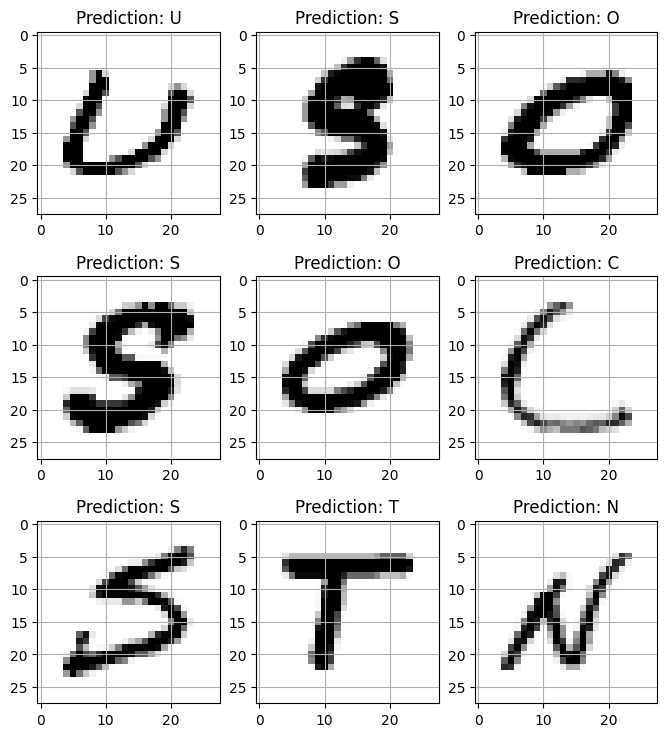

In [21]:
# Now we will finally have the things to show on the graph we are getting 9 images from
# The train set 
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
# To showing the 9 images we will loop though the data from test model and will predict the 
# images on the basis of CNN model of keras/tensorflow. 
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()
#Here we go below are the results 

In [22]:
# All the images are correct by the CNN model 
# Here we can upload our JPG image to the project and we will see it will work correctly or not
# I put the Image "W" in the image 
# You can write your selected alphabet on paper and then click the image and upload it on the 
# Jupyter
img = cv2.imread(r'A.jpg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [23]:
#Gaussain Method used for Blur checking
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [24]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Arslan's Prediction: ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "New Predic: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

1/1 [==============================] - 0s 155ms/step


In [26]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()